In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pykmclust.KMeans import *

In [2]:
plt.style.use('default') 
plt.rc('font',  size=9) 
plt.rc('figure', figsize=(4,3), dpi=150) 

## Make data

In [12]:
n = 200
d = 2
K = 4
sigma = 0.1

data = np.zeros((n,d))
for i in range(n):
    if np.random.rand() < 0.25:
        data[i,:] = sigma * np.random.randn(2)
    elif np.random.rand() < 0.5:
        data[i,:] = 1+ sigma * np.random.randn(2)
    elif np.random.rand() < 0.75:
        data[i,0] = 1+ sigma * np.random.randn()
        data[i,1] = sigma * np.random.randn()
    else:
        data[i,1] = 1+ sigma * np.random.randn()
        data[i,0] = sigma * np.random.randn()

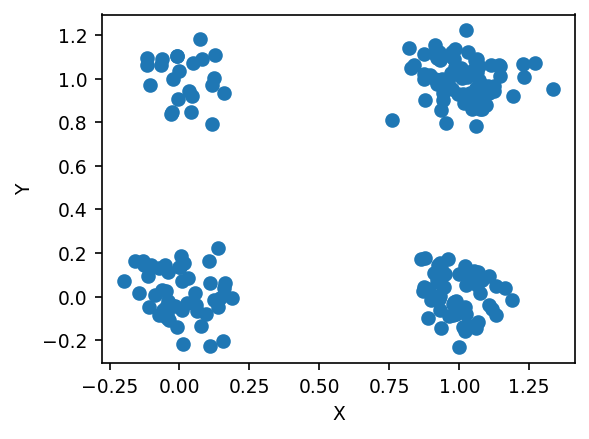

In [13]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.savefig('./Project figures/toydata.pdf')

## Fit model

In [14]:
model = KMeans(k=4)

In [15]:
centroids, assignment, inertia = model.fit(data=data, distance=euclidean, nruns=5, randomseed=0, verbose=False)

1 iterations completed.
2 iterations completed.
3 iterations completed.
4 iterations completed.
1 iterations completed.
2 iterations completed.
3 iterations completed.
4 iterations completed.
5 iterations completed.
1 iterations completed.
2 iterations completed.
3 iterations completed.
4 iterations completed.
5 iterations completed.
6 iterations completed.
1 iterations completed.
2 iterations completed.
3 iterations completed.
1 iterations completed.
2 iterations completed.
3 iterations completed.
4 iterations completed.


In [16]:
print(centroids)
print(assignment)
print(inertia)

[[0.0013992  0.01183628]
 [0.01726609 0.99903991]
 [1.0148919  0.99778401]
 [0.99748475 0.01415144]]
[0 3 2 0 3 3 2 3 0 3 3 3 0 3 0 0 3 3 2 2 1 0 0 0 3 0 2 0 2 2 0 2 2 2 3 2 3
 2 0 0 0 3 3 2 0 0 2 2 1 3 2 3 2 3 3 2 2 0 2 0 3 0 2 2 2 2 2 2 2 2 2 3 0 2
 0 1 2 2 3 3 1 2 2 3 1 0 0 0 2 1 0 3 2 3 3 2 1 2 2 0 3 1 3 3 2 2 0 0 3 1 3
 2 2 3 3 0 1 0 2 2 1 0 3 2 3 2 2 2 3 0 2 1 2 2 0 3 2 2 3 0 1 0 1 2 0 3 3 2
 0 0 2 1 3 2 0 1 2 3 0 2 1 0 0 3 2 3 1 3 2 2 0 2 1 1 2 2 0 0 2 2 1 0 2 3 3
 1 2 2 3 0 2 3 3 1 3 2 3 0 3 0]
25.177041913780613


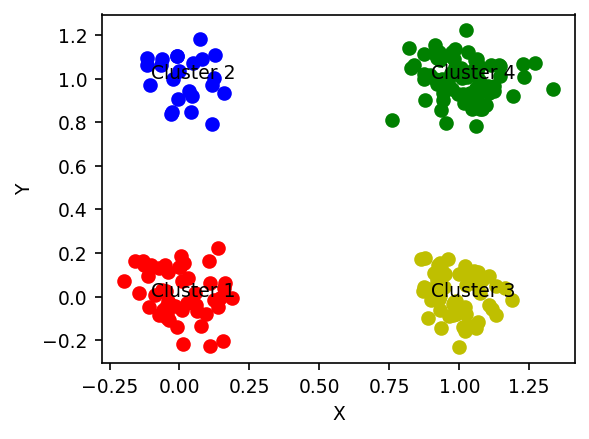

In [20]:
plt.scatter(data[assignment==0,0], data[assignment==0,1], color='r')
plt.scatter(data[assignment==1,0], data[assignment==1,1], color='b')
plt.scatter(data[assignment==2,0], data[assignment==2,1], color='g')
plt.scatter(data[assignment==3,0], data[assignment==3,1], color='y')

plt.text(0-0.1, 0, "Cluster 1")
plt.text(0-0.1, 1, "Cluster 2")
plt.text(1-0.1, 0, "Cluster 3")
plt.text(1-0.1, 1, "Cluster 4")

plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.savefig('./Project figures/toydata_fitted.pdf')

## Optimal k

In [22]:
krange = np.arange(1,9)
cost = np.zeros_like(krange)

for i,k in enumerate(krange):
    model = KMeans(k=k)
    centroids, assignment, inertia = model.fit(data=data, distance=euclidean, nruns=5, randomseed=0, verbose=False)
    cost[i] = inertia

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
//anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


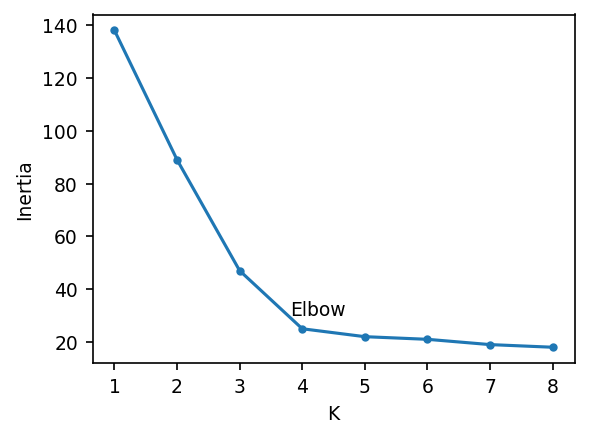

In [27]:
plt.plot(krange, cost, '.-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.text(3.8, 30, "Elbow")

plt.tight_layout()
plt.savefig('./Project figures/elbow.pdf')

## Dimensionality

In [36]:
n = 200
d = 800
K = 4
sigma = 0.1

data = np.zeros((n,d))
for i in range(n):
    if np.random.rand() < 0.25:
        mean = np.zeros(d)
        cov = np.eye(d)*(sigma**2)
        data[i,:] = np.random.multivariate_normal(mean, cov, 1)
    elif np.random.rand() < 0.5:
        mean = np.zeros(d)
        mean[0] = 1
        mean[1] = 1
        cov = np.eye(d)*(sigma**2)
        data[i,:] = np.random.multivariate_normal(mean, cov, 1)
    elif np.random.rand() < 0.75:
        mean = np.zeros(d)
        mean[0] = 1
        cov = np.eye(d)*(sigma**2)
        data[i,:] = np.random.multivariate_normal(mean, cov, 1)
    else:
        mean = np.zeros(d)
        mean[1] = 1
        cov = np.eye(d)*(sigma**2)
        data[i,:] = np.random.multivariate_normal(mean, cov, 1)

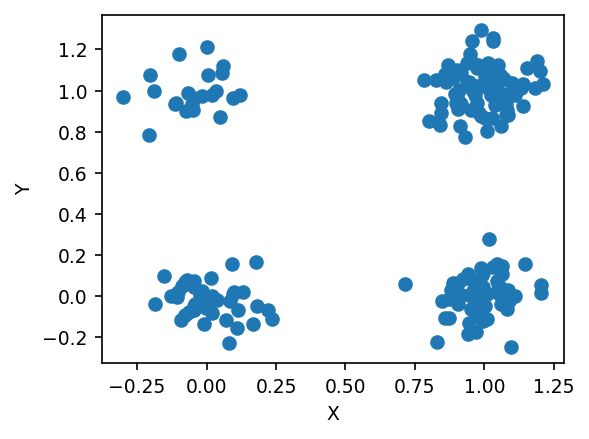

In [37]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()

In [38]:
model = KMeans(k=4)
centroids, assignment, inertia = model.fit(data=data, distance=euclidean, nruns=5, randomseed=0, verbose=False)

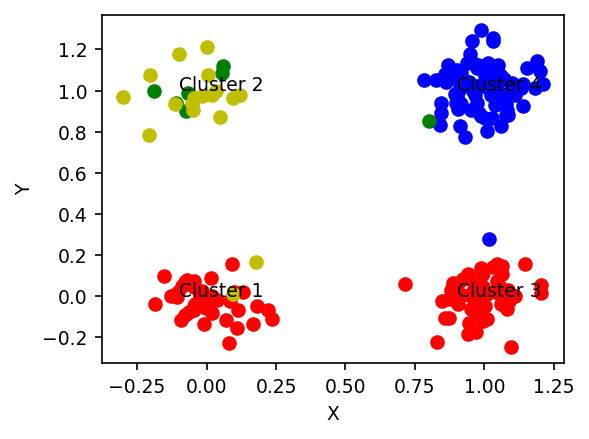

In [39]:
plt.scatter(data[assignment==0,0], data[assignment==0,1], color='r')
plt.scatter(data[assignment==1,0], data[assignment==1,1], color='b')
plt.scatter(data[assignment==2,0], data[assignment==2,1], color='g')
plt.scatter(data[assignment==3,0], data[assignment==3,1], color='y')

plt.text(0-0.1, 0, "Cluster 1")
plt.text(0-0.1, 1, "Cluster 2")
plt.text(1-0.1, 0, "Cluster 3")
plt.text(1-0.1, 1, "Cluster 4")

plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.savefig('./Project figures/toydata_fitted_highd.pdf')

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
//anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


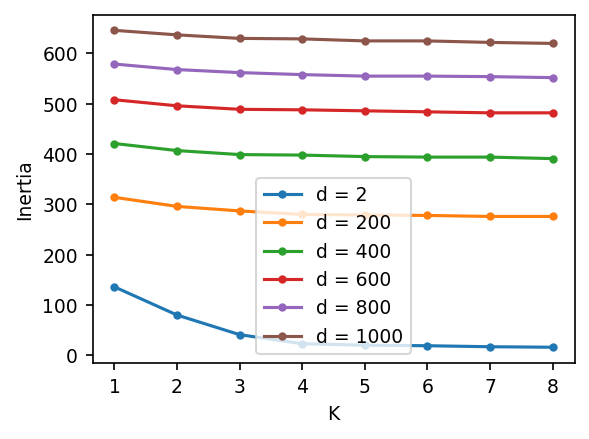

In [28]:
drange = np.array([2,200,400,600,800,1000])

n = 200
sigma = 0.1
for d in drange:
    # make data
    data = np.zeros((n,d))
    for i in range(n):
        if np.random.rand() < 0.25:
            mean = np.zeros(d)
            cov = np.eye(d)*(sigma**2)
            data[i,:] = np.random.multivariate_normal(mean, cov, 1)
        elif np.random.rand() < 0.5:
            mean = np.zeros(d)
            mean[0] = 1
            mean[1] = 1
            cov = np.eye(d)*(sigma**2)
            data[i,:] = np.random.multivariate_normal(mean, cov, 1)
        elif np.random.rand() < 0.75:
            mean = np.zeros(d)
            mean[0] = 1
            cov = np.eye(d)*(sigma**2)
            data[i,:] = np.random.multivariate_normal(mean, cov, 1)
        else:
            mean = np.zeros(d)
            mean[1] = 1
            cov = np.eye(d)*(sigma**2)
            data[i,:] = np.random.multivariate_normal(mean, cov, 1)
            
    # fit model
    krange = np.arange(1,9)
    cost = np.zeros_like(krange)

    for i,k in enumerate(krange):
        model = KMeans(k=k)
        centroids, assignment, inertia = model.fit(data=data, distance=euclidean, nruns=5, randomseed=0, verbose=False)
        cost[i] = inertia
        
    # plot
    plt.plot(krange, cost, '.-', label="d = "+str(d))

plt.legend()
plt.xlabel('K')
plt.ylabel('Inertia')
plt.tight_layout()
plt.savefig('./Project figures/dim_elbow_euclidean.pdf')
    

No handles with labels found to put in legend.


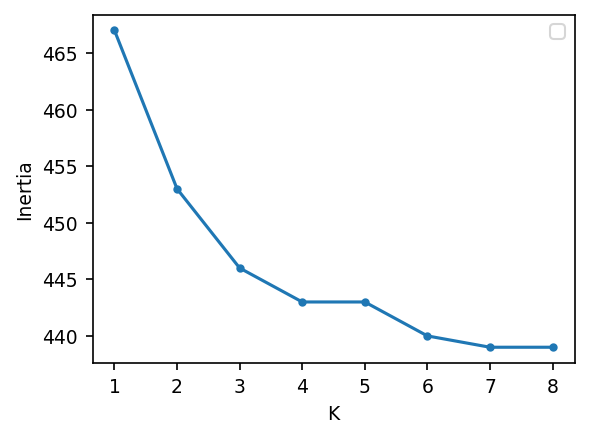

In [34]:
n = 200
sigma = 0.1
d = 500

# make data
data = np.zeros((n,d))
for i in range(n):
    if np.random.rand() < 0.25:
        mean = np.zeros(d)
        cov = np.eye(d)*(sigma**2)
        data[i,:] = np.random.multivariate_normal(mean, cov, 1)
    elif np.random.rand() < 0.5:
        mean = np.zeros(d)
        mean[0] = 1
        mean[1] = 1
        cov = np.eye(d)*(sigma**2)
        data[i,:] = np.random.multivariate_normal(mean, cov, 1)
    elif np.random.rand() < 0.75:
        mean = np.zeros(d)
        mean[0] = 1
        cov = np.eye(d)*(sigma**2)
        data[i,:] = np.random.multivariate_normal(mean, cov, 1)
    else:
        mean = np.zeros(d)
        mean[1] = 1
        cov = np.eye(d)*(sigma**2)
        data[i,:] = np.random.multivariate_normal(mean, cov, 1)

# fit model
krange = np.arange(1,9)
cost = np.zeros_like(krange)

for i,k in enumerate(krange):
    model = KMeans(k=k)
    centroids, assignment, inertia = model.fit(data=data, distance=euclidean, nruns=5, randomseed=0, verbose=False)
    cost[i] = inertia

# plot
plt.plot(krange, cost, '.-')

plt.legend()
plt.xlabel('K')
plt.ylabel('Inertia')
plt.tight_layout()
plt.savefig('./Project figures/dim500_elbow_euclidean.pdf')

No handles with labels found to put in legend.


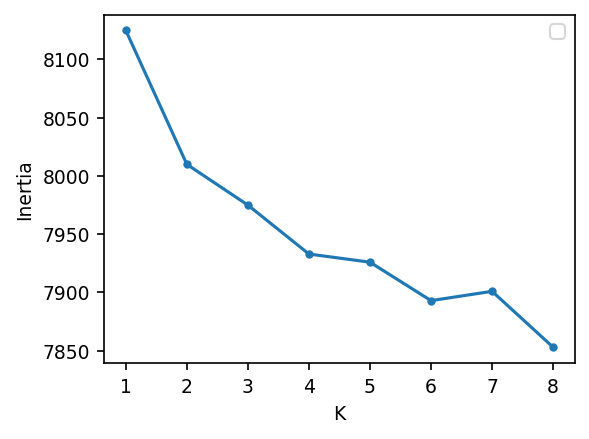

In [4]:
n = 200
sigma = 0.1
d = 500

# make data
data = np.zeros((n,d))
for i in range(n):
    if np.random.rand() < 0.25:
        mean = np.zeros(d)
        cov = np.eye(d)*(sigma**2)
        data[i,:] = np.random.multivariate_normal(mean, cov, 1)
    elif np.random.rand() < 0.5:
        mean = np.zeros(d)
        mean[0] = 1
        mean[1] = 1
        cov = np.eye(d)*(sigma**2)
        data[i,:] = np.random.multivariate_normal(mean, cov, 1)
    elif np.random.rand() < 0.75:
        mean = np.zeros(d)
        mean[0] = 1
        cov = np.eye(d)*(sigma**2)
        data[i,:] = np.random.multivariate_normal(mean, cov, 1)
    else:
        mean = np.zeros(d)
        mean[1] = 1
        cov = np.eye(d)*(sigma**2)
        data[i,:] = np.random.multivariate_normal(mean, cov, 1)

# fit model
krange = np.arange(1,9)
cost = np.zeros_like(krange)

for i,k in enumerate(krange):
    model = KMeans(k=k)
    centroids, assignment, inertia = model.fit(data=data, distance=manhattan, nruns=5, randomseed=0, verbose=False)
    cost[i] = inertia

# plot
plt.plot(krange, cost, '.-')

plt.legend()
plt.xlabel('K')
plt.ylabel('Inertia')
plt.tight_layout()
plt.savefig('./Project figures/dim500_elbow_manhattan.pdf')

No handles with labels found to put in legend.


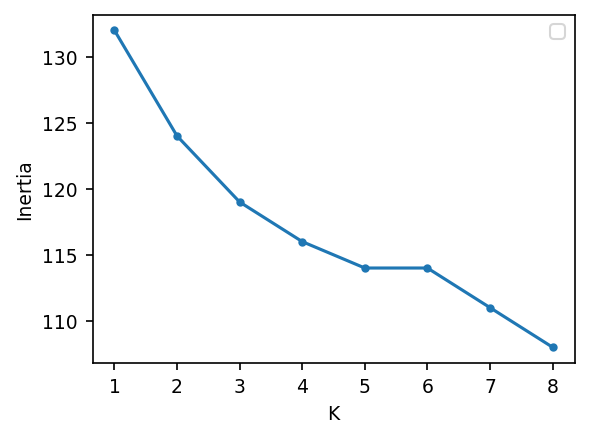

In [5]:
n = 200
sigma = 0.1
d = 500

# make data
data = np.zeros((n,d))
for i in range(n):
    if np.random.rand() < 0.25:
        mean = np.zeros(d)
        cov = np.eye(d)*(sigma**2)
        data[i,:] = np.random.multivariate_normal(mean, cov, 1)
    elif np.random.rand() < 0.5:
        mean = np.zeros(d)
        mean[0] = 1
        mean[1] = 1
        cov = np.eye(d)*(sigma**2)
        data[i,:] = np.random.multivariate_normal(mean, cov, 1)
    elif np.random.rand() < 0.75:
        mean = np.zeros(d)
        mean[0] = 1
        cov = np.eye(d)*(sigma**2)
        data[i,:] = np.random.multivariate_normal(mean, cov, 1)
    else:
        mean = np.zeros(d)
        mean[1] = 1
        cov = np.eye(d)*(sigma**2)
        data[i,:] = np.random.multivariate_normal(mean, cov, 1)

# fit model
krange = np.arange(1,9)
cost = np.zeros_like(krange)

for i,k in enumerate(krange):
    model = KMeans(k=k)
    centroids, assignment, inertia = model.fit(data=data, distance=correlation, nruns=5, randomseed=0, verbose=False)
    cost[i] = inertia

# plot
plt.plot(krange, cost, '.-')

plt.legend()
plt.xlabel('K')
plt.ylabel('Inertia')
plt.tight_layout()
plt.savefig('./Project figures/dim500_elbow_correlation.pdf')

## Nested clusters

In [3]:
n = 200
d = 2
K = 2
sigma = 0.1

data = np.zeros((n,d))
for i in range(n):
    if np.random.rand() < 0.5:
        mean = np.zeros(d)
        cov = np.eye(d)*(sigma**2)
        data[i,:] = np.random.multivariate_normal(mean, cov, 1)
    else:
        angle = np.random.uniform(0,2*np.pi)
        mean = np.zeros(d)
        mean[0] = 1*np.cos(angle)
        mean[1] = 1*np.sin(angle)
        cov = np.eye(d)*(sigma**2)
        data[i,:] = np.random.multivariate_normal(mean, cov, 1)

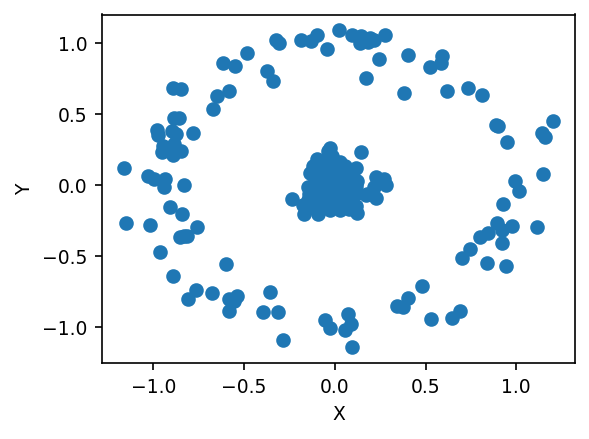

In [4]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.savefig('./Project figures/nesteddata.pdf')

In [5]:
model = KMeans(k=2)
centroids, assignment, inertia = model.fit(data=data, distance=euclidean, nruns=5, randomseed=0, verbose=False)

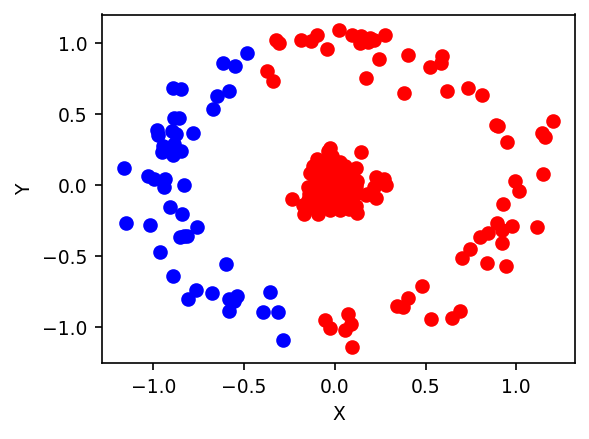

In [6]:
plt.scatter(data[assignment==0,0], data[assignment==0,1], color='r')
plt.scatter(data[assignment==1,0], data[assignment==1,1], color='b')

plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.savefig('./Project figures/fittednested.pdf')